## Упражнение 10

In [ ]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python
!pip install --upgrade scikit-learn==0.23.0

In [1]:
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [2]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [3]:
imagePaths = sorted(list(paths.list_images('train')))
trainData = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    trainData.append(hist)
    labels.append(label)
    
Y = [1 if x == 'cat' else 0 for x in labels]

1


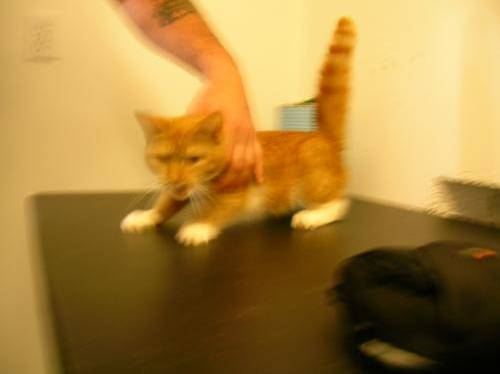

In [4]:
print(Y[0])
Image(filename=imagePaths[0])

**Бэггинг деревьев принятия решений**  
Писать значения, которые у вас в задании

In [5]:
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=20, #максимальное число листьев
                              random_state=92)
bagging = BaggingClassifier(tree, #базовый алгоритм
                            n_estimators=20, #количество деревьев
                            random_state=92)
bagging.fit(trainData, Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_leaf_nodes=20,
                                                        min_samples_leaf=10,
                                                        random_state=92),
                  n_estimators=20, random_state=92)

**Классификатор с мягким зазором и параметрами**  
Писать значения, указаные в задании

In [6]:
svm = LinearSVC(random_state = 92, C = 1.92)
svm.fit(trainData, Y)

LinearSVC(C=1.92, random_state=92)

**Случайный лес с параметрами**  
Писать значения, указаные в задании

In [7]:
forest = RandomForestClassifier(n_estimators=20, #количество деревьев
                             criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=20, #максимальное число листьев
                              random_state=92)
forest.fit(trainData, Y)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=20,
                       min_samples_leaf=10, n_estimators=20, random_state=92)

**Метаалгоритм - логистическая регрессия**  

In [8]:
lr = LogisticRegression(solver='lbfgs', random_state=92)

In [9]:
base_estimators = [('SVM', svm), ('Bagging DT', bagging), ('DecisionForest', forest)]
sclf = StackingClassifier(estimators=base_estimators, final_estimator=lr, cv=2) # здесь CV, изменить
sclf.fit(trainData, Y)

StackingClassifier(cv=2,
                   estimators=[('SVM', LinearSVC(C=1.92, random_state=92)),
                               ('Bagging DT',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                        max_leaf_nodes=20,
                                                                                        min_samples_leaf=10,
                                                                                        random_state=92),
                                                  n_estimators=20,
                                                  random_state=92)),
                               ('DecisionForest',
                                RandomForestClassifier(criterion='entropy',
                                                       max_leaf_nodes=20,
                                                       min_samples_leaf=10,
          

**Первый ответ**  
Accuracy

In [10]:
sclf.score(trainData, Y)

0.849

**Ответы 2-5**  
Вставлять название файлов

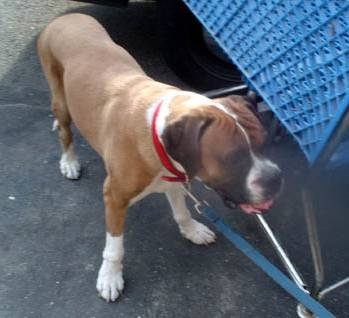

In [11]:
singleImage = cv2.imread('test/dog.1019.jpg') #вставлять сюда
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = sclf.predict(histt2)
Image(filename='test/dog.1019.jpg') #вставлять сюда

In [12]:
prediction

array([0])

Класс 0 dog это нулевой элемент  
Класс 1 cat это первый элемент

In [13]:
sclf.predict_proba(histt2)

array([[0.72907738, 0.27092262]])